### 1. Importing libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [18]:
# This option ensures the graphs which will be created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing

In [20]:
# Import data

df = pd.read_csv('2015-2019_Dystopia.csv')

In [24]:
# Verify the imported data

df.head()

,Happiness Rank,Country,Region,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,Dystopia_Residuals,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.517,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.702,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.492,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.465,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.452,2015


In [35]:
# Remove the categorical columns

df_dropped = df.drop(['Happiness Rank', 'Country', 'Region', 'Dystopia_Residuals', 'Year'], axis=1)

In [37]:
# Verify the imported data

df_dropped.head()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


##### **Comment:**
The difference between the variables’ scales are not large, therefore there will be no data standardization. 

### 3. Use the elbow technique to determine the optimal number of clusters

In [43]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [48]:
score = [kmeans[i].fit(df_dropped).score(df_dropped) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarnin

[-1297.9134958880018,
 -487.48974578327005,
 -304.6559072299238,
 -235.03452204451844,
 -192.10312967061037,
 -174.68267757836475,
 -161.11666594419034,
 -150.2601477377305,
 -143.9223999356421]

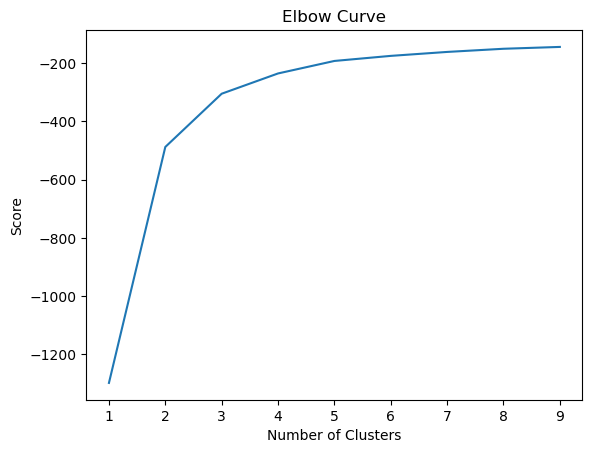

In [51]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 4. Make an informed decision about the number of clusters to use in the k-means algorithm

As the example in the Exercise, there is a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for the clusters is three.

### 5. Run the k-means algorithm.

In [62]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [65]:
# Fit the k-means object to the data.

kmeans.fit(df_dropped)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### 6. Attach a new column to the dataframe with the resulting clusters

In [85]:
# Create a new column called 'clusters' with the cluster assigned for each data point

df_dropped['clusters'] = kmeans.fit_predict(df_dropped)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
# Verify the data in the dataframe

df_dropped.head()

,Happiness Score,GDP per Capita,Social Support,Life Expectancy,Freedom,Perceptions of Corruption,Generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [89]:
# Check the number of data points per cluster

df_dropped['clusters'].value_counts()

clusters
2    308
1    280
0    195
Name: count, dtype: int64

### 7. Create a few different visualizations using the clustered data

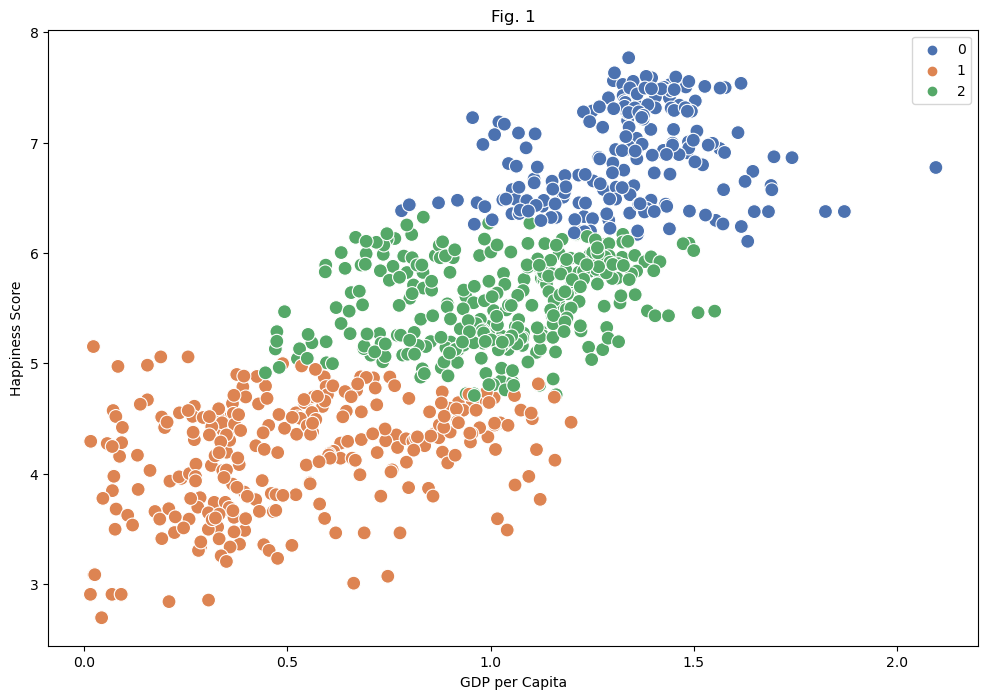

In [120]:
# Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_dropped['GDP per Capita'], y=df_dropped['Happiness Score'], hue=kmeans.labels_, palette="deep", s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Fig. 1')
plt.xlabel('GDP per Capita') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

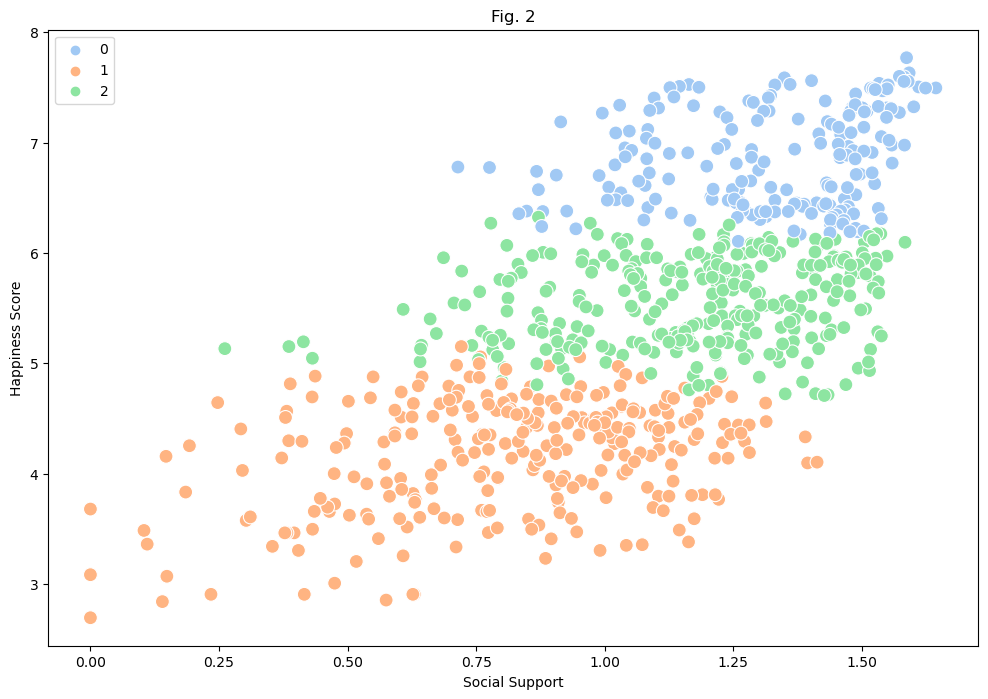

In [122]:
# Plot the clusters for the "Happiness Score" and "Social Support" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_dropped['Social Support'], y=df_dropped['Happiness Score'], hue=kmeans.labels_, palette="pastel", s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Fig. 2')
plt.xlabel('Social Support') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

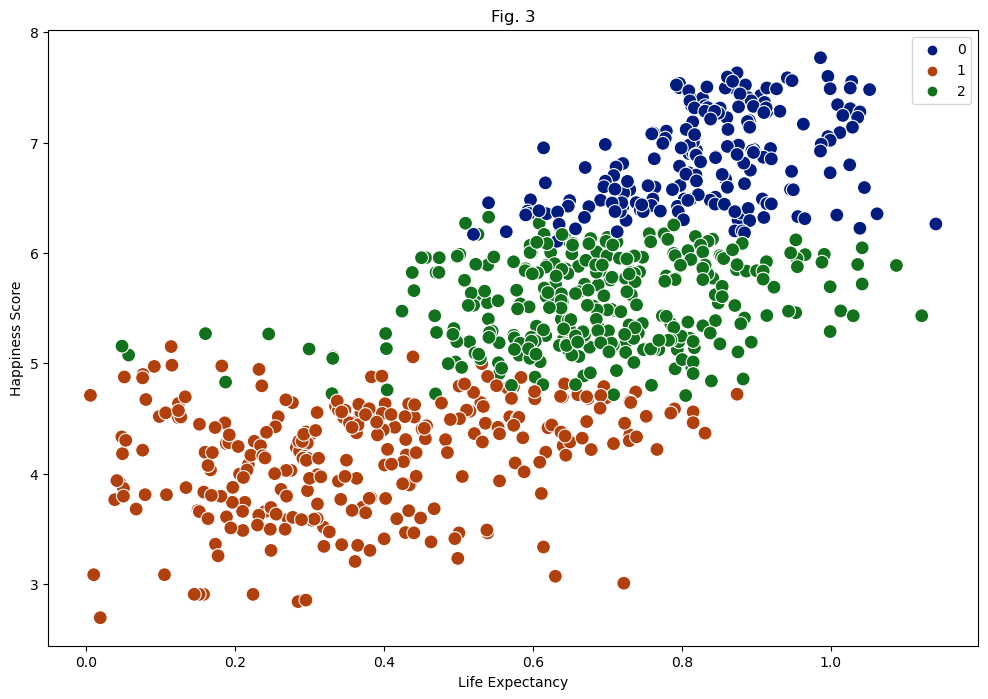

In [138]:
# Plot the clusters for the "Happiness Score" and "Life Expectancy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_dropped['Life Expectancy'], y=df_dropped['Happiness Score'], hue=kmeans.labels_, palette="dark", s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Fig. 3')
plt.xlabel('Life Expectancy') # Label x-axis.
plt.ylabel('Happiness Score') # Label y-axis.
plt.show()

### 8. Discuss how and why the clusters make sense

**Figure 1** presents three distinct clusters based on Happiness Scores and GDP per Capita. The first cluster (blue, coded “0” in the legend) is the smallest and represents data points with the highest Happiness Scores and relatively high GDP per Capita. This suggests a potential correlation between high GDP and high happiness, although the small size of the cluster warrants further investigation. The second cluster (green, coded “2”) comprises points with medium Happiness Scores and GDP per Capita lower than the first cluster but higher than the third. This intermediate cluster indicates that while GDP may play a role in happiness, it's not the sole determinant, as these points have moderate happiness despite differing economic levels. Finally, the third cluster (brown, coded “1”) contains data points with the lowest Happiness Scores and GDP per Capita. This further supports the potential link between economic factors and happiness, as the lowest GDP values are associated with the lowest happiness scores. However, it's important to acknowledge that correlation does not equal causation, and other factors likely contribute.

**Figures 2 and 3** employ the same clustering methodology as Figure 1. Figure 2 examines Happiness Score vs. Social Support, while Figure 3 examines Happiness Score vs. Life Expectancy. Given that the distributions in Figures 2 and 3 are somewhat similar to Figure 1, this suggests that Social Support and Life Expectancy may also be correlated with Happiness Score, similar to the observed relationship with GDP per Capita. This convergence across different indicators (GDP, Social Support, and Life Expectancy) strengthens the argument that these factors play significant roles in determining overall happiness. The similar clustering patterns suggest that countries or regions that score high in one area (e.g., GDP) tend to score high in the others (Social Support and Life Expectancy) as well, and vice versa. This could indicate underlying systemic factors that contribute to well-being across multiple dimensions. However, it's crucial to analyze the specific characteristics of the clusters in Figures 2 and 3 to identify any nuances or differences in how these factors relate to happiness compared to GDP. For instance, are the clusters perfectly overlapping, or are there countries that have high social support but lower GDP, or vice versa? Such further analysis can provide a more comprehensive understanding of the interplay between these variables and happiness.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [159]:
# Associate the clusters with the colors in the legend of Fig. 3

df_dropped.loc[df_dropped['clusters'] == 0, 'cluster'] = 'blue'
df_dropped.loc[df_dropped['clusters'] == 1, 'cluster'] = 'brown'
df_dropped.loc[df_dropped['clusters'] == 2, 'cluster'] = 'green'

In [161]:
df_dropped.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'GDP per Capita':['mean', 'median'], 
                         'Social Support':['mean', 'median'],
                         'Life Expectancy':['mean', 'median']})

Happiness Score         GDP per Capita           Social Support  \
                   mean  median           mean    median           mean   
cluster                                                                   
blue           6.852815  6.8520       1.334637  1.343280       1.319922   
brown          4.163965  4.2830       0.520600  0.471775       0.813566   
green          5.538536  5.5265       1.012643  1.026438       1.167969   

                  Life Expectancy            
           median            mean    median  
cluster                                      
blue     1.368000        0.832985  0.837950  
brown    0.847915        0.377086  0.357870  
green    1.209280        0.687155  0.685079

##### **Discussion**

**Blue Cluster:** This cluster represents the "happiest" group. It has:

- The highest mean and median Happiness Scores (around 6.85).
- The highest mean and median GDP per Capita (around 1.33-1.34).
- The highest mean and median Social Support (around 1.32-1.37).
- The highest mean and median Life Expectancy (around 0.83).

Interpretation: This cluster likely represents wealthier nations with strong social support systems and longer life expectancies, which contribute to higher happiness levels.
  
**Brown Cluster:** This cluster represents the "least happy" group. It has:

- The lowest mean and median Happiness Scores (around 4.16-4.28).
- The lowest mean and median GDP per Capita (around 0.52-0.47).
- The lowest mean and median Social Support (around 0.81-0.85).
- The lowest mean and median Life Expectancy (around 0.38-0.36).

Interpretation: This cluster likely represents nations facing significant economic challenges, weaker social support, and lower life expectancies, all of which contribute to lower happiness levels. The medians being slightly higher than the means for Happiness and Social Support, and slightly lower for GDP and Life Expectancy, suggest a right skew for Happiness and Social Support and a left skew for GDP and Life Expectancy.

**Green Cluster:** This cluster represents an "intermediate" group. It has:

- Medium mean and median Happiness Scores (around 5.54-5.53).
- Medium mean and median GDP per Capita (around 1.01-1.03).
- Medium mean and median Social Support (around 1.17-1.21).
- Medium mean and median Life Expectancy (around 0.69-0.69).

Interpretation: This cluster likely represents nations with moderate economic development, social support, and life expectancy, leading to moderate happiness levels. The means and medians being very close suggest a relatively symmetrical distribution for all variables in this cluster.

**Key Observations:**

- There is a clear positive correlation between Happiness Score and the other three variables (GDP, Social Support, and Life Expectancy). Higher values in these variables are associated with higher happiness.
- The clusters are well-separated, indicating that the clustering algorithm effectively grouped similar data points.
- The comparison of mean and median within each cluster suggests some skewness in the distributions, particularly in the brown cluster.

### 10. Propose what these results could be useful for in future steps of an analytics pipeline

- Create a new categorical feature representing cluster membership
(e.g., "Happiness Cluster"). This feature can then be used in subsequent modeling tasks. 
It essentially captures the combined effect of GDP, Social Support, and Life Expectancy on happiness.

- Create interaction terms between the cluster membership and the original variables. For example, "GDP * Happiness Cluster" could reveal how the impact of GDP on happiness varies across different clusters.

- Perform separate analyses for each cluster which would allow to identify cluster-specific relationships and avoid the assumption that the relationships between variables are the same across all data points.

- Train separate regression models for each cluster. This allows for different relationships between the predictors and the Happiness Score in each group, potentially leading to more accurate and nuanced predictions.

-  Investigate other variables (e.g., freedom to make life choices, generosity, corruption perception) within each cluster. This can provide a deeper understanding of the factors that differentiate the clusters beyond the initial variables used for clustering.